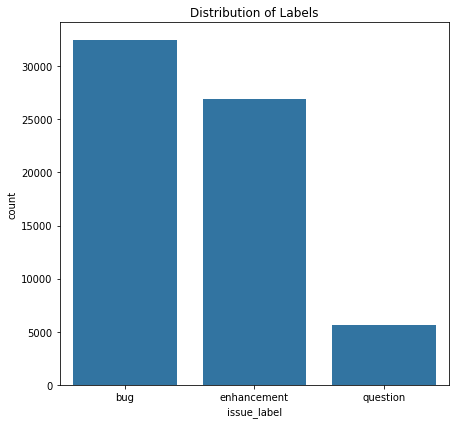

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated dataset
df = pd.read_csv('./sample2.csv')

# Display the first few rows of the dataset
df.head()

# Visualize data composition
plt.figure(figsize=(12, 6))

# Plot distribution of labels
plt.subplot(1, 2, 1)
sns.countplot(x='issue_label', data=df)
plt.title('Distribution of Labels')

plt.tight_layout()
plt.show()


In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from pandas import notnull

# Text pre-processing functions
def tokenize(text):
    return word_tokenize(text)

def normalize(text):
    return text.lower()

def remove_noise(text):
    # Remove special characters, numbers, and punctuation
    return re.sub(r'[^a-zA-Z\s]', '', text)

def stem(text):
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in text.split()])

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word not in stop_words])

def preprocess_text(x):
    return remove_stopwords(lemmatize(stem(remove_noise(normalize(x))))) if notnull(x) else ''

In [7]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from pickle import load


with open('../data/random_forest_model_updated.pkl', 'rb') as file:
    model_pipeline = load(file)

df = pd.read_csv('./sample1.csv')

# Apply text pre-processing to relevant columns
df['processed_title'] = df['issue_title'].apply(preprocess_text)

# Apply text pre-processing to the 'issue_body' column
df['processed_body'] = df['issue_body'].apply(preprocess_text)

X_train, X_test, y_train, y_test = train_test_split(df[['processed_title', 'processed_body']], df['issue_label'], test_size=0.2, random_state=42)

y_pred = model_pipeline.predict(X_test['processed_title'] + ' ' + X_test['processed_body'])

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         bug       0.78      0.85      0.81      7236
 enhancement       0.76      0.83      0.79      5935
    question       0.65      0.03      0.06      1287

    accuracy                           0.77     14458
   macro avg       0.73      0.57      0.56     14458
weighted avg       0.76      0.77      0.74     14458

